In [1]:
import pandas as pd
import numpy as np
import talib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

2024-05-15 15:50:31.246597: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
btcdf=pd.read_csv('./BTC-USD.csv')

In [3]:
btcdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-21,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,37429485518
1,2022-11-22,15782.300781,16253.047852,15656.606445,16189.769531,16189.769531,30726828760
2,2022-11-23,16195.588867,16638.193359,16170.502930,16610.707031,16610.707031,32958875628
3,2022-11-24,16611.636719,16771.474609,16501.767578,16604.464844,16604.464844,26129037414
4,2022-11-25,16602.269531,16603.316406,16388.404297,16521.841797,16521.841797,18678255976


In [4]:
sp500recent=pd.read_csv('./Download Data - INDEX_US_S&P US_SPX.csv')

In [5]:
sp500recent=sp500recent[::-1].reset_index(drop=True)

In [6]:
sp500recent

,Date,Open,High,Low,Close
0,04/03/2023,"4,102.20","4,127.66","4,098.79","4,124.51"
1,04/04/2023,"4,128.03","4,133.13","4,086.87","4,100.60"
2,04/05/2023,"4,094.50","4,099.69","4,072.56","4,090.38"
3,04/06/2023,"4,081.58","4,107.32","4,069.84","4,105.02"
4,04/10/2023,"4,085.20","4,109.50","4,072.55","4,109.11"
...,...,...,...,...,...
246,03/26/2024,"5,228.85","5,235.16","5,203.42","5,203.58"
247,03/27/2024,"5,226.31","5,249.26","5,213.92","5,248.49"
248,03/28/2024,"5,248.03","5,264.85","5,245.82","5,254.35"
249,04/01/2024,"5,257.97","5,263.95","5,229.20","5,243.77"


In [7]:
sp500older=pd.read_csv('./Download Data - INDEX_US_S&P US_SPX-3 earlier.csv')

In [8]:
sp500older=sp500older[::-1].reset_index(drop=True)

In [9]:
sp500older

,Date,Open,High,Low,Close
0,11/21/2022,"3,956.23","3,962.00","3,933.34","3,949.94"
1,11/22/2022,"3,965.51","4,005.88","3,956.88","4,003.58"
2,11/23/2022,"4,001.02","4,033.78","3,998.66","4,027.26"
3,11/25/2022,"4,023.34","4,034.02","4,020.76","4,026.12"
4,11/28/2022,"4,005.36","4,012.27","3,955.77","3,963.94"
...,...,...,...,...,...
65,02/27/2023,"3,992.36","4,018.05","3,973.55","3,982.24"
66,02/28/2023,"3,977.19","3,997.50","3,968.98","3,970.15"
67,03/01/2023,"3,963.34","3,971.73","3,939.05","3,951.39"
68,03/02/2023,"3,938.68","3,990.84","3,928.16","3,981.35"


In [10]:
sp500joined=pd.concat([sp500older,sp500recent],axis=0)

In [11]:
sp500joined.reset_index(drop=True)

,Date,Open,High,Low,Close
0,11/21/2022,"3,956.23","3,962.00","3,933.34","3,949.94"
1,11/22/2022,"3,965.51","4,005.88","3,956.88","4,003.58"
2,11/23/2022,"4,001.02","4,033.78","3,998.66","4,027.26"
3,11/25/2022,"4,023.34","4,034.02","4,020.76","4,026.12"
4,11/28/2022,"4,005.36","4,012.27","3,955.77","3,963.94"
...,...,...,...,...,...
316,03/26/2024,"5,228.85","5,235.16","5,203.42","5,203.58"
317,03/27/2024,"5,226.31","5,249.26","5,213.92","5,248.49"
318,03/28/2024,"5,248.03","5,264.85","5,245.82","5,254.35"
319,04/01/2024,"5,257.97","5,263.95","5,229.20","5,243.77"


In [12]:
#change the values of the date in the 'Date' column of the s&p500 dataframe to match the date format in the BTC df
sp500joined['Date'] = pd.to_datetime(sp500joined['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')

In [13]:
sp500joined

,Date,Open,High,Low,Close
0,2022-11-21,"3,956.23","3,962.00","3,933.34","3,949.94"
1,2022-11-22,"3,965.51","4,005.88","3,956.88","4,003.58"
2,2022-11-23,"4,001.02","4,033.78","3,998.66","4,027.26"
3,2022-11-25,"4,023.34","4,034.02","4,020.76","4,026.12"
4,2022-11-28,"4,005.36","4,012.27","3,955.77","3,963.94"
...,...,...,...,...,...
246,2024-03-26,"5,228.85","5,235.16","5,203.42","5,203.58"
247,2024-03-27,"5,226.31","5,249.26","5,213.92","5,248.49"
248,2024-03-28,"5,248.03","5,264.85","5,245.82","5,254.35"
249,2024-04-01,"5,257.97","5,263.95","5,229.20","5,243.77"


In [14]:
#Merge the completed s&p500 df with the BTC dataframe
btcsp500df=btcdf.merge(sp500joined,how='left',on='Date')

In [15]:
#Fill up missing s&p500 values that occur due to weekends and other non-trading days
btcsp500df=btcsp500df.fillna(method='ffill')

In [16]:
btcsp500df

,Date,Open_x,High_x,Low_x,Close_x,Adj Close,Volume,Open_y,High_y,Low_y,Close_y
0,2022-11-21,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,37429485518,"3,956.23","3,962.00","3,933.34","3,949.94"
1,2022-11-22,15782.300781,16253.047852,15656.606445,16189.769531,16189.769531,30726828760,"3,965.51","4,005.88","3,956.88","4,003.58"
2,2022-11-23,16195.588867,16638.193359,16170.502930,16610.707031,16610.707031,32958875628,"4,001.02","4,033.78","3,998.66","4,027.26"
3,2022-11-24,16611.636719,16771.474609,16501.767578,16604.464844,16604.464844,26129037414,"4,001.02","4,033.78","3,998.66","4,027.26"
4,2022-11-25,16602.269531,16603.316406,16388.404297,16521.841797,16521.841797,18678255976,"4,023.34","4,034.02","4,020.76","4,026.12"
...,...,...,...,...,...,...,...,...,...,...,...
495,2024-03-30,69893.445313,70355.492188,69601.062500,69645.304688,69645.304688,17130241883,"5,248.03","5,264.85","5,245.82","5,254.35"
496,2024-03-31,69647.781250,71377.781250,69624.867188,71333.648438,71333.648438,20050941373,"5,248.03","5,264.85","5,245.82","5,254.35"
497,2024-04-01,71333.484375,71342.093750,68110.695313,69702.148438,69702.148438,34873527352,"5,257.97","5,263.95","5,229.20","5,243.77"
498,2024-04-02,69705.023438,69708.382813,64586.593750,65446.972656,65446.972656,50705240709,"5,204.29","5,208.34","5,184.05","5,205.81"


In [17]:
#btcdf containing data that goes further back than current btc df to make sure TIs all have warm start
olderbtcdf=pd.read_csv('./BTC-USD earlier.csv')

In [18]:
olderbtcdf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-27,21028.238281,21478.089844,20620.199219,20735.478516,20735.478516,2.096570e+10
1,2022-06-28,20731.544922,21164.423828,20228.812500,20280.634766,20280.634766,2.138154e+10
2,2022-06-29,20281.169922,20364.156250,19937.791016,20104.023438,20104.023438,2.355274e+10
3,2022-06-30,20108.312500,20141.160156,18729.656250,19784.726563,19784.726563,2.626724e+10
4,2022-07-01,19820.470703,20632.671875,19073.708984,19269.367188,19269.367188,3.076755e+10
...,...,...,...,...,...,...,...
643,2024-03-31,69647.781250,71377.781250,69624.867188,71333.648438,71333.648438,2.005094e+10
644,2024-04-01,71333.484375,71342.093750,68110.695313,69702.148438,69702.148438,3.487353e+10
645,2024-04-02,69705.023438,69708.382813,64586.593750,65446.972656,65446.972656,5.070524e+10
646,2024-04-03,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Add these TIs often associated with BTC
olderbtcdf['50MA']=talib.MA(olderbtcdf['Close'],timeperiod=50,matype=0)
olderbtcdf['100MA']=talib.MA(olderbtcdf['Close'],timeperiod=100,matype=0)
olderbtcdf['RSI']=talib.RSI(olderbtcdf['Close'],timeperiod=14)
olderbtcdf['macd'], olderbtcdf['macdsignal'],olderbtcdf['macdhist'] = talib.MACD(olderbtcdf['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
olderbtcdf['20WMA']=talib.MA(olderbtcdf['Close'],timeperiod=140,matype=0)
olderbtcdf['21WEMA']=talib.EMA(olderbtcdf['Close'],timeperiod=147)
olderbtcdf['8WEMA']=talib.EMA(olderbtcdf['Close'],timeperiod=56)

In [20]:
olderbtcdf

,Date,Open,High,Low,Close,Adj Close,Volume,50MA,100MA,RSI,macd,macdsignal,macdhist,20WMA,21WEMA,8WEMA
0,2022-06-27,21028.238281,21478.089844,20620.199219,20735.478516,20735.478516,2.096570e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-06-28,20731.544922,21164.423828,20228.812500,20280.634766,20280.634766,2.138154e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-29,20281.169922,20364.156250,19937.791016,20104.023438,20104.023438,2.355274e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-06-30,20108.312500,20141.160156,18729.656250,19784.726563,19784.726563,2.626724e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-07-01,19820.470703,20632.671875,19073.708984,19269.367188,19269.367188,3.076755e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2024-03-31,69647.781250,71377.781250,69624.867188,71333.648438,71333.648438,2.005094e+10,62060.732031,52611.450625,60.290822,2135.455325,2239.956171,-104.500846,49020.907534,50784.284944,61381.620779
644,2024-04-01,71333.484375,71342.093750,68110.695313,69702.148438,69702.148438,3.487353e+10,62488.896641,52871.076680,56.230588,2033.214116,2198.607760,-165.393644,49258.048912,51039.931748,61673.569118
645,2024-04-02,69705.023438,69708.382813,64586.593750,65446.972656,65446.972656,5.070524e+10,62798.671641,53095.385235,47.286223,1590.495851,2076.985378,-486.489527,49471.686998,51234.621490,61805.969242
646,2024-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
relevantcolumns=olderbtcdf.iloc[147:,7:]

In [22]:
relevantcolumns

,50MA,100MA,RSI,macd,macdsignal,macdhist,20WMA,21WEMA,8WEMA
147,19003.359180,19711.196660,31.395434,-943.971087,-802.481689,-141.489398,20469.276451,20405.151363,18771.212247
148,18934.682969,19629.901016,35.914150,-932.315739,-828.448499,-103.867240,20440.702553,20348.186744,18680.635309
149,18860.160234,19554.638359,40.340007,-878.980316,-838.554862,-40.425453,20412.577274,20297.680261,18608.006247
150,18789.035195,19481.850098,40.295565,-827.674386,-836.378767,8.704381,20376.626395,20247.771945,18537.706548
151,18720.363164,19413.708535,39.672548,-784.636257,-826.030265,41.394008,20339.417285,20197.421537,18466.974452
...,...,...,...,...,...,...,...,...,...
643,62060.732031,52611.450625,60.290822,2135.455325,2239.956171,-104.500846,49020.907534,50784.284944,61381.620779
644,62488.896641,52871.076680,56.230588,2033.214116,2198.607760,-165.393644,49258.048912,51039.931748,61673.569118
645,62798.671641,53095.385235,47.286223,1590.495851,2076.985378,-486.489527,49471.686998,51234.621490,61805.969242
646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
btcsp500tadf=pd.concat([btcsp500df, relevantcolumns.reset_index(drop=True)], axis=1)

In [24]:
btcsp500tadf

,Date,Open_x,High_x,Low_x,Close_x,Adj Close,Volume,Open_y,High_y,Low_y,Close_y,50MA,100MA,RSI,macd,macdsignal,macdhist,20WMA,21WEMA,8WEMA
0,2022-11-21,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,3.742949e+10,"3,956.23","3,962.00","3,933.34","3,949.94",19003.359180,19711.196660,31.395434,-943.971087,-802.481689,-141.489398,20469.276451,20405.151363,18771.212247
1,2022-11-22,15782.300781,16253.047852,15656.606445,16189.769531,16189.769531,3.072683e+10,"3,965.51","4,005.88","3,956.88","4,003.58",18934.682969,19629.901016,35.914150,-932.315739,-828.448499,-103.867240,20440.702553,20348.186744,18680.635309
2,2022-11-23,16195.588867,16638.193359,16170.502930,16610.707031,16610.707031,3.295888e+10,"4,001.02","4,033.78","3,998.66","4,027.26",18860.160234,19554.638359,40.340007,-878.980316,-838.554862,-40.425453,20412.577274,20297.680261,18608.006247
3,2022-11-24,16611.636719,16771.474609,16501.767578,16604.464844,16604.464844,2.612904e+10,"4,001.02","4,033.78","3,998.66","4,027.26",18789.035195,19481.850098,40.295565,-827.674386,-836.378767,8.704381,20376.626395,20247.771945,18537.706548
4,2022-11-25,16602.269531,16603.316406,16388.404297,16521.841797,16521.841797,1.867826e+10,"4,023.34","4,034.02","4,020.76","4,026.12",18720.363164,19413.708535,39.672548,-784.636257,-826.030265,41.394008,20339.417285,20197.421537,18466.974452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2024-03-31,69647.781250,71377.781250,69624.867188,71333.648438,71333.648438,2.005094e+10,"5,248.03","5,264.85","5,245.82","5,254.35",62060.732031,52611.450625,60.290822,2135.455325,2239.956171,-104.500846,49020.907534,50784.284944,61381.620779
497,2024-04-01,71333.484375,71342.093750,68110.695313,69702.148438,69702.148438,3.487353e+10,"5,257.97","5,263.95","5,229.20","5,243.77",62488.896641,52871.076680,56.230588,2033.214116,2198.607760,-165.393644,49258.048912,51039.931748,61673.569118
498,2024-04-02,69705.023438,69708.382813,64586.593750,65446.972656,65446.972656,5.070524e+10,"5,204.29","5,208.34","5,184.05","5,205.81",62798.671641,53095.385235,47.286223,1590.495851,2076.985378,-486.489527,49471.686998,51234.621490,61805.969242
499,2024-04-03,65465.406250,66481.984375,64809.460938,66121.281250,66121.281250,4.558438e+10,"5,204.29","5,208.34","5,184.05","5,205.81",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#drop uncessary columns and keep the relevant ones(closing prices for s&p500 and btc as well as btc volume)
btcsp500tadf.drop(['Open_x','High_x','Low_x','Adj Close','Open_y','High_y','Low_y'],axis=1,inplace=True)

In [26]:
btcsp500tadf

,Date,Close_x,Volume,Close_y,50MA,100MA,RSI,macd,macdsignal,macdhist,20WMA,21WEMA,8WEMA
0,2022-11-21,15787.284180,3.742949e+10,"3,949.94",19003.359180,19711.196660,31.395434,-943.971087,-802.481689,-141.489398,20469.276451,20405.151363,18771.212247
1,2022-11-22,16189.769531,3.072683e+10,"4,003.58",18934.682969,19629.901016,35.914150,-932.315739,-828.448499,-103.867240,20440.702553,20348.186744,18680.635309
2,2022-11-23,16610.707031,3.295888e+10,"4,027.26",18860.160234,19554.638359,40.340007,-878.980316,-838.554862,-40.425453,20412.577274,20297.680261,18608.006247
3,2022-11-24,16604.464844,2.612904e+10,"4,027.26",18789.035195,19481.850098,40.295565,-827.674386,-836.378767,8.704381,20376.626395,20247.771945,18537.706548
4,2022-11-25,16521.841797,1.867826e+10,"4,026.12",18720.363164,19413.708535,39.672548,-784.636257,-826.030265,41.394008,20339.417285,20197.421537,18466.974452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2024-03-31,71333.648438,2.005094e+10,"5,254.35",62060.732031,52611.450625,60.290822,2135.455325,2239.956171,-104.500846,49020.907534,50784.284944,61381.620779
497,2024-04-01,69702.148438,3.487353e+10,"5,243.77",62488.896641,52871.076680,56.230588,2033.214116,2198.607760,-165.393644,49258.048912,51039.931748,61673.569118
498,2024-04-02,65446.972656,5.070524e+10,"5,205.81",62798.671641,53095.385235,47.286223,1590.495851,2076.985378,-486.489527,49471.686998,51234.621490,61805.969242
499,2024-04-03,66121.281250,4.558438e+10,"5,205.81",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
btcsp500tadf.rename(columns={"Close_x": "BTC_Close",'Volume':'BTC_Volume','Close_y':'S&P500_Close'},inplace=True)

In [28]:
ethdf=pd.read_csv('./ETH-USD.csv')
ethdf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-21,1142.395752,1142.395752,1084.857300,1108.353027,1108.353027,14080099208
1,2022-11-22,1107.895996,1136.442627,1081.138184,1135.173462,1135.173462,12040670755
2,2022-11-23,1135.421509,1184.997314,1130.022827,1183.199585,1183.199585,11242676044
3,2022-11-24,1183.345093,1211.627441,1180.379761,1203.983154,1203.983154,9706372376
4,2022-11-25,1203.799438,1203.799438,1174.823364,1198.925903,1198.925903,5483308196
...,...,...,...,...,...,...,...
495,2024-03-30,3511.827637,3566.084473,3489.902100,3507.944336,3507.944336,9389066783
496,2024-03-31,3507.951660,3655.218994,3507.242676,3647.856445,3647.856445,10499881424
497,2024-04-01,3647.819580,3648.129150,3418.695313,3505.030029,3505.030029,16002098681
498,2024-04-02,3504.818359,3506.962891,3215.985107,3277.234619,3277.234619,22076539151


In [29]:
#add ETH to the main df
btcsp500tadf['ETH_Close']=ethdf['Close']

In [30]:
btcsp500tadf

,Date,BTC_Close,BTC_Volume,S&P500_Close,50MA,100MA,RSI,macd,macdsignal,macdhist,20WMA,21WEMA,8WEMA,ETH_Close
0,2022-11-21,15787.284180,3.742949e+10,"3,949.94",19003.359180,19711.196660,31.395434,-943.971087,-802.481689,-141.489398,20469.276451,20405.151363,18771.212247,1108.353027
1,2022-11-22,16189.769531,3.072683e+10,"4,003.58",18934.682969,19629.901016,35.914150,-932.315739,-828.448499,-103.867240,20440.702553,20348.186744,18680.635309,1135.173462
2,2022-11-23,16610.707031,3.295888e+10,"4,027.26",18860.160234,19554.638359,40.340007,-878.980316,-838.554862,-40.425453,20412.577274,20297.680261,18608.006247,1183.199585
3,2022-11-24,16604.464844,2.612904e+10,"4,027.26",18789.035195,19481.850098,40.295565,-827.674386,-836.378767,8.704381,20376.626395,20247.771945,18537.706548,1203.983154
4,2022-11-25,16521.841797,1.867826e+10,"4,026.12",18720.363164,19413.708535,39.672548,-784.636257,-826.030265,41.394008,20339.417285,20197.421537,18466.974452,1198.925903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2024-03-31,71333.648438,2.005094e+10,"5,254.35",62060.732031,52611.450625,60.290822,2135.455325,2239.956171,-104.500846,49020.907534,50784.284944,61381.620779,3647.856445
497,2024-04-01,69702.148438,3.487353e+10,"5,243.77",62488.896641,52871.076680,56.230588,2033.214116,2198.607760,-165.393644,49258.048912,51039.931748,61673.569118,3505.030029
498,2024-04-02,65446.972656,5.070524e+10,"5,205.81",62798.671641,53095.385235,47.286223,1590.495851,2076.985378,-486.489527,49471.686998,51234.621490,61805.969242,3277.234619
499,2024-04-03,66121.281250,4.558438e+10,"5,205.81",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3356.906006


In [31]:
goldOlder=pd.read_csv('./Download Data - FUTURE_US_XNYM_GC00 earlier.csv')
goldOlder=goldOlder[::-1].reset_index(drop=True)

In [32]:
goldOlder

,Date,Open,High,Low,Close
0,11/21/2022,"1,739.70","1,746.30","1,738.90","1,739.60"
1,11/22/2022,"1,740.80","1,743.60","1,739.40","1,739.90"
2,11/23/2022,"1,751.00","1,756.30","1,750.00","1,745.60"
3,11/25/2022,"1,754.00","1,754.00","1,745.90","1,754.00"
4,11/28/2022,"1,739.50","1,745.10","1,737.90","1,740.30"
...,...,...,...,...,...
86,03/28/2023,"1,957.80","1,977.10","1,949.90","1,973.50"
87,03/29/2023,"1,975.40","1,976.00","1,959.50","1,966.90"
88,03/30/2023,"1,982.70","2,002.40","1,971.60","1,997.70"
89,03/31/2023,"1,998.00","2,005.50","1,984.20","1,986.20"


In [33]:
goldNewer=pd.read_csv('./Download Data - FUTURE_US_XNYM_GC00.csv')
goldNewer=goldNewer[::-1].reset_index(drop=True)
goldNewer.drop([0],inplace=True)

In [34]:
goldNewer

,Date,Open,High,Low,Close
1,04/04/2023,"2,001.30","2,043.40","1,994.00","2,038.20"
2,04/05/2023,"2,038.20","2,049.20","2,026.10","2,035.60"
3,04/06/2023,"2,037.10","2,037.70","2,016.50","2,026.40"
4,04/10/2023,"2,008.60","2,021.50","1,996.50","2,003.80"
5,04/11/2023,"2,007.00","2,022.50","2,003.70","2,019.00"
...,...,...,...,...,...
246,03/26/2024,"2,173.00","2,200.60","2,168.30","2,177.20"
247,03/27/2024,"2,200.50","2,218.30","2,193.70","2,212.70"
248,03/28/2024,"2,215.70","2,256.90","2,207.50","2,238.40"
249,04/01/2024,"2,259.20","2,286.40","2,249.10","2,257.10"


In [35]:
gold=pd.concat([goldOlder,goldNewer],axis=0)

In [36]:
gold.reset_index(drop=True)
gold['Date']=pd.to_datetime(gold['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')

In [37]:
btcsp500tadf.reset_index(drop=True)

,Date,BTC_Close,BTC_Volume,S&P500_Close,50MA,100MA,RSI,macd,macdsignal,macdhist,20WMA,21WEMA,8WEMA,ETH_Close
0,2022-11-21,15787.284180,3.742949e+10,"3,949.94",19003.359180,19711.196660,31.395434,-943.971087,-802.481689,-141.489398,20469.276451,20405.151363,18771.212247,1108.353027
1,2022-11-22,16189.769531,3.072683e+10,"4,003.58",18934.682969,19629.901016,35.914150,-932.315739,-828.448499,-103.867240,20440.702553,20348.186744,18680.635309,1135.173462
2,2022-11-23,16610.707031,3.295888e+10,"4,027.26",18860.160234,19554.638359,40.340007,-878.980316,-838.554862,-40.425453,20412.577274,20297.680261,18608.006247,1183.199585
3,2022-11-24,16604.464844,2.612904e+10,"4,027.26",18789.035195,19481.850098,40.295565,-827.674386,-836.378767,8.704381,20376.626395,20247.771945,18537.706548,1203.983154
4,2022-11-25,16521.841797,1.867826e+10,"4,026.12",18720.363164,19413.708535,39.672548,-784.636257,-826.030265,41.394008,20339.417285,20197.421537,18466.974452,1198.925903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2024-03-31,71333.648438,2.005094e+10,"5,254.35",62060.732031,52611.450625,60.290822,2135.455325,2239.956171,-104.500846,49020.907534,50784.284944,61381.620779,3647.856445
497,2024-04-01,69702.148438,3.487353e+10,"5,243.77",62488.896641,52871.076680,56.230588,2033.214116,2198.607760,-165.393644,49258.048912,51039.931748,61673.569118,3505.030029
498,2024-04-02,65446.972656,5.070524e+10,"5,205.81",62798.671641,53095.385235,47.286223,1590.495851,2076.985378,-486.489527,49471.686998,51234.621490,61805.969242,3277.234619
499,2024-04-03,66121.281250,4.558438e+10,"5,205.81",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3356.906006


In [38]:
dfcomplete=btcsp500tadf.merge(gold,how='left',on='Date')

In [39]:
dfcomplete.drop(['Open','High','Low'],axis=1,inplace=True)

In [40]:
dfcomplete.rename(columns={'Close':'Gold_Close'},inplace=True)

In [41]:
dfcomplete['BTC_Tdy']=dfcomplete['BTC_Close']

In [42]:
dfcomplete

,Date,BTC_Close,BTC_Volume,S&P500_Close,50MA,100MA,RSI,macd,macdsignal,macdhist,20WMA,21WEMA,8WEMA,ETH_Close,Gold_Close,BTC_Tdy
0,2022-11-21,15787.284180,3.742949e+10,"3,949.94",19003.359180,19711.196660,31.395434,-943.971087,-802.481689,-141.489398,20469.276451,20405.151363,18771.212247,1108.353027,"1,739.60",15787.284180
1,2022-11-22,16189.769531,3.072683e+10,"4,003.58",18934.682969,19629.901016,35.914150,-932.315739,-828.448499,-103.867240,20440.702553,20348.186744,18680.635309,1135.173462,"1,739.90",16189.769531
2,2022-11-23,16610.707031,3.295888e+10,"4,027.26",18860.160234,19554.638359,40.340007,-878.980316,-838.554862,-40.425453,20412.577274,20297.680261,18608.006247,1183.199585,"1,745.60",16610.707031
3,2022-11-24,16604.464844,2.612904e+10,"4,027.26",18789.035195,19481.850098,40.295565,-827.674386,-836.378767,8.704381,20376.626395,20247.771945,18537.706548,1203.983154,NaN,16604.464844
4,2022-11-25,16521.841797,1.867826e+10,"4,026.12",18720.363164,19413.708535,39.672548,-784.636257,-826.030265,41.394008,20339.417285,20197.421537,18466.974452,1198.925903,"1,754.00",16521.841797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2024-03-31,71333.648438,2.005094e+10,"5,254.35",62060.732031,52611.450625,60.290822,2135.455325,2239.956171,-104.500846,49020.907534,50784.284944,61381.620779,3647.856445,NaN,71333.648438
497,2024-04-01,69702.148438,3.487353e+10,"5,243.77",62488.896641,52871.076680,56.230588,2033.214116,2198.607760,-165.393644,49258.048912,51039.931748,61673.569118,3505.030029,"2,257.10",69702.148438
498,2024-04-02,65446.972656,5.070524e+10,"5,205.81",62798.671641,53095.385235,47.286223,1590.495851,2076.985378,-486.489527,49471.686998,51234.621490,61805.969242,3277.234619,"2,281.80",65446.972656
499,2024-04-03,66121.281250,4.558438e+10,"5,205.81",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3356.906006,NaN,66121.281250


In [43]:
dfcompleteshifted=dfcomplete.shift(1)

In [44]:
dfcompleteshifted.Date=dfcompleteshifted.Date.shift(-1)

In [45]:
dfcompleteshifted.BTC_Tdy=dfcompleteshifted.BTC_Tdy.shift(-1)

In [46]:
dfcompleteshifted

,Date,BTC_Close,BTC_Volume,S&P500_Close,50MA,100MA,RSI,macd,macdsignal,macdhist,20WMA,21WEMA,8WEMA,ETH_Close,Gold_Close,BTC_Tdy
0,2022-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15787.284180
1,2022-11-22,15787.284180,3.742949e+10,"3,949.94",19003.359180,19711.196660,31.395434,-943.971087,-802.481689,-141.489398,20469.276451,20405.151363,18771.212247,1108.353027,"1,739.60",16189.769531
2,2022-11-23,16189.769531,3.072683e+10,"4,003.58",18934.682969,19629.901016,35.914150,-932.315739,-828.448499,-103.867240,20440.702553,20348.186744,18680.635309,1135.173462,"1,739.90",16610.707031
3,2022-11-24,16610.707031,3.295888e+10,"4,027.26",18860.160234,19554.638359,40.340007,-878.980316,-838.554862,-40.425453,20412.577274,20297.680261,18608.006247,1183.199585,"1,745.60",16604.464844
4,2022-11-25,16604.464844,2.612904e+10,"4,027.26",18789.035195,19481.850098,40.295565,-827.674386,-836.378767,8.704381,20376.626395,20247.771945,18537.706548,1203.983154,NaN,16521.841797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2024-03-31,69645.304688,1.713024e+10,"5,254.35",61589.484610,52338.093164,57.330162,2068.774755,2266.081382,-197.306628,48776.056613,50502.786814,61019.728865,3507.944336,NaN,71333.648438
497,2024-04-01,71333.648438,2.005094e+10,"5,254.35",62060.732031,52611.450625,60.290822,2135.455325,2239.956171,-104.500846,49020.907534,50784.284944,61381.620779,3647.856445,NaN,69702.148438
498,2024-04-02,69702.148438,3.487353e+10,"5,243.77",62488.896641,52871.076680,56.230588,2033.214116,2198.607760,-165.393644,49258.048912,51039.931748,61673.569118,3505.030029,"2,257.10",65446.972656
499,2024-04-03,65446.972656,5.070524e+10,"5,205.81",62798.671641,53095.385235,47.286223,1590.495851,2076.985378,-486.489527,49471.686998,51234.621490,61805.969242,3277.234619,"2,281.80",66121.281250


In [47]:
dfcompleteshifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          500 non-null    object 
 1   BTC_Close     500 non-null    float64
 2   BTC_Volume    500 non-null    float64
 3   S&P500_Close  500 non-null    object 
 4   50MA          499 non-null    float64
 5   100MA         499 non-null    float64
 6   RSI           499 non-null    float64
 7   macd          499 non-null    float64
 8   macdsignal    499 non-null    float64
 9   macdhist      499 non-null    float64
 10  20WMA         499 non-null    float64
 11  21WEMA        499 non-null    float64
 12  8WEMA         499 non-null    float64
 13  ETH_Close     500 non-null    float64
 14  Gold_Close    341 non-null    object 
 15  BTC_Tdy       500 non-null    float64
dtypes: float64(13), object(3)
memory usage: 66.5+ KB


In [48]:
dfcompleteshifted.drop([0,500],inplace=True)

In [49]:
dfcompleteshifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 1 to 499
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          499 non-null    object 
 1   BTC_Close     499 non-null    float64
 2   BTC_Volume    499 non-null    float64
 3   S&P500_Close  499 non-null    object 
 4   50MA          499 non-null    float64
 5   100MA         499 non-null    float64
 6   RSI           499 non-null    float64
 7   macd          499 non-null    float64
 8   macdsignal    499 non-null    float64
 9   macdhist      499 non-null    float64
 10  20WMA         499 non-null    float64
 11  21WEMA        499 non-null    float64
 12  8WEMA         499 non-null    float64
 13  ETH_Close     499 non-null    float64
 14  Gold_Close    341 non-null    object 
 15  BTC_Tdy       499 non-null    float64
dtypes: float64(13), object(3)
memory usage: 66.3+ KB


In [50]:
dfcompleteshifted=dfcompleteshifted.fillna(method='ffill')

In [51]:
dfcompleteshifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 1 to 499
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          499 non-null    object 
 1   BTC_Close     499 non-null    float64
 2   BTC_Volume    499 non-null    float64
 3   S&P500_Close  499 non-null    object 
 4   50MA          499 non-null    float64
 5   100MA         499 non-null    float64
 6   RSI           499 non-null    float64
 7   macd          499 non-null    float64
 8   macdsignal    499 non-null    float64
 9   macdhist      499 non-null    float64
 10  20WMA         499 non-null    float64
 11  21WEMA        499 non-null    float64
 12  8WEMA         499 non-null    float64
 13  ETH_Close     499 non-null    float64
 14  Gold_Close    499 non-null    object 
 15  BTC_Tdy       499 non-null    float64
dtypes: float64(13), object(3)
memory usage: 66.3+ KB


In [52]:
dfcompleteshifted

,Date,BTC_Close,BTC_Volume,S&P500_Close,50MA,100MA,RSI,macd,macdsignal,macdhist,20WMA,21WEMA,8WEMA,ETH_Close,Gold_Close,BTC_Tdy
1,2022-11-22,15787.284180,3.742949e+10,"3,949.94",19003.359180,19711.196660,31.395434,-943.971087,-802.481689,-141.489398,20469.276451,20405.151363,18771.212247,1108.353027,"1,739.60",16189.769531
2,2022-11-23,16189.769531,3.072683e+10,"4,003.58",18934.682969,19629.901016,35.914150,-932.315739,-828.448499,-103.867240,20440.702553,20348.186744,18680.635309,1135.173462,"1,739.90",16610.707031
3,2022-11-24,16610.707031,3.295888e+10,"4,027.26",18860.160234,19554.638359,40.340007,-878.980316,-838.554862,-40.425453,20412.577274,20297.680261,18608.006247,1183.199585,"1,745.60",16604.464844
4,2022-11-25,16604.464844,2.612904e+10,"4,027.26",18789.035195,19481.850098,40.295565,-827.674386,-836.378767,8.704381,20376.626395,20247.771945,18537.706548,1203.983154,"1,745.60",16521.841797
5,2022-11-26,16521.841797,1.867826e+10,"4,026.12",18720.363164,19413.708535,39.672548,-784.636257,-826.030265,41.394008,20339.417285,20197.421537,18466.974452,1198.925903,"1,754.00",16464.281250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2024-03-30,69892.828125,2.523085e+10,"5,254.35",61139.522500,52080.331641,57.918033,2125.478921,2315.408039,-189.929118,48543.861942,50240.560542,60706.071562,3511.806152,"2,238.40",69645.304688
496,2024-03-31,69645.304688,1.713024e+10,"5,254.35",61589.484610,52338.093164,57.330162,2068.774755,2266.081382,-197.306628,48776.056613,50502.786814,61019.728865,3507.944336,"2,238.40",71333.648438
497,2024-04-01,71333.648438,2.005094e+10,"5,254.35",62060.732031,52611.450625,60.290822,2135.455325,2239.956171,-104.500846,49020.907534,50784.284944,61381.620779,3647.856445,"2,238.40",69702.148438
498,2024-04-02,69702.148438,3.487353e+10,"5,243.77",62488.896641,52871.076680,56.230588,2033.214116,2198.607760,-165.393644,49258.048912,51039.931748,61673.569118,3505.030029,"2,257.10",65446.972656


In [53]:
#Convert S&P500 Close and Gold Close from objects to floats
dfcompleteshifted['S&P500_Close']=pd.to_numeric(dfcompleteshifted['S&P500_Close'].str.replace(',', ''))
dfcompleteshifted['Gold_Close']=pd.to_numeric(dfcompleteshifted['Gold_Close'].str.replace(',', ''))

In [54]:
dfcompleteshifted.info()
#All information has been collated to one dataframe and the dataframe has been cleaned. Data shuffling and splitting comes next

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 1 to 499
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          499 non-null    object 
 1   BTC_Close     499 non-null    float64
 2   BTC_Volume    499 non-null    float64
 3   S&P500_Close  499 non-null    float64
 4   50MA          499 non-null    float64
 5   100MA         499 non-null    float64
 6   RSI           499 non-null    float64
 7   macd          499 non-null    float64
 8   macdsignal    499 non-null    float64
 9   macdhist      499 non-null    float64
 10  20WMA         499 non-null    float64
 11  21WEMA        499 non-null    float64
 12  8WEMA         499 non-null    float64
 13  ETH_Close     499 non-null    float64
 14  Gold_Close    499 non-null    float64
 15  BTC_Tdy       499 non-null    float64
dtypes: float64(15), object(1)
memory usage: 66.3+ KB


In [55]:
dfcompleteshifted

,Date,BTC_Close,BTC_Volume,S&P500_Close,50MA,100MA,RSI,macd,macdsignal,macdhist,20WMA,21WEMA,8WEMA,ETH_Close,Gold_Close,BTC_Tdy
1,2022-11-22,15787.284180,3.742949e+10,3949.94,19003.359180,19711.196660,31.395434,-943.971087,-802.481689,-141.489398,20469.276451,20405.151363,18771.212247,1108.353027,1739.6,16189.769531
2,2022-11-23,16189.769531,3.072683e+10,4003.58,18934.682969,19629.901016,35.914150,-932.315739,-828.448499,-103.867240,20440.702553,20348.186744,18680.635309,1135.173462,1739.9,16610.707031
3,2022-11-24,16610.707031,3.295888e+10,4027.26,18860.160234,19554.638359,40.340007,-878.980316,-838.554862,-40.425453,20412.577274,20297.680261,18608.006247,1183.199585,1745.6,16604.464844
4,2022-11-25,16604.464844,2.612904e+10,4027.26,18789.035195,19481.850098,40.295565,-827.674386,-836.378767,8.704381,20376.626395,20247.771945,18537.706548,1203.983154,1745.6,16521.841797
5,2022-11-26,16521.841797,1.867826e+10,4026.12,18720.363164,19413.708535,39.672548,-784.636257,-826.030265,41.394008,20339.417285,20197.421537,18466.974452,1198.925903,1754.0,16464.281250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2024-03-30,69892.828125,2.523085e+10,5254.35,61139.522500,52080.331641,57.918033,2125.478921,2315.408039,-189.929118,48543.861942,50240.560542,60706.071562,3511.806152,2238.4,69645.304688
496,2024-03-31,69645.304688,1.713024e+10,5254.35,61589.484610,52338.093164,57.330162,2068.774755,2266.081382,-197.306628,48776.056613,50502.786814,61019.728865,3507.944336,2238.4,71333.648438
497,2024-04-01,71333.648438,2.005094e+10,5254.35,62060.732031,52611.450625,60.290822,2135.455325,2239.956171,-104.500846,49020.907534,50784.284944,61381.620779,3647.856445,2238.4,69702.148438
498,2024-04-02,69702.148438,3.487353e+10,5243.77,62488.896641,52871.076680,56.230588,2033.214116,2198.607760,-165.393644,49258.048912,51039.931748,61673.569118,3505.030029,2257.1,65446.972656


In [56]:
#shuffle the data
train=399
test=100
shuffledata=dfcompleteshifted.sample(frac=1, random_state=42)

In [57]:
shuffledata

,Date,BTC_Close,BTC_Volume,S&P500_Close,50MA,100MA,RSI,macd,macdsignal,macdhist,20WMA,21WEMA,8WEMA,ETH_Close,Gold_Close,BTC_Tdy
461,2024-02-25,51571.101563,1.517408e+10,5088.80,45390.555313,43310.319063,67.824854,2090.643449,2187.154702,-96.511253,40250.285659,40733.572963,45960.501734,2992.385986,2049.4,51733.238281
74,2023-02-03,23471.871094,3.206694e+10,4179.76,19199.916641,18520.316680,69.886564,1270.308777,1343.605248,-73.296471,18765.096736,19589.355184,20055.927690,1643.241577,1930.8,23449.322266
232,2023-07-11,30414.470703,1.482821e+10,4409.53,28178.281016,28274.795606,59.146039,646.861885,790.352620,-143.490735,27312.086802,26859.039269,28702.513181,1880.556396,1931.0,30620.951172
176,2023-05-16,27192.693359,1.441323e+10,4136.28,28484.076992,26221.095566,41.812565,-420.411257,-223.521162,-196.890096,24478.005566,25140.052615,27588.300898,1817.549927,2022.7,27036.650391
238,2023-07-17,30249.132813,8.516564e+09,4505.42,28636.120625,28425.416113,53.273755,462.819108,610.270490,-147.451382,27603.945731,27148.965096,29059.134584,1923.681885,1964.4,30145.888672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2023-03-08,22219.769531,2.276545e+10,4045.64,23002.944336,20144.911719,41.600970,-109.951157,127.524352,-237.475509,19656.204171,20882.487308,22203.481083,1561.933105,1820.0,21718.080078
271,2023-08-19,26049.556641,2.402624e+10,4369.71,29669.033867,28538.540000,19.010498,-520.942137,-218.573669,-302.368468,28600.543945,27881.079919,29062.370372,1660.945068,1916.5,26096.205078
349,2023-11-05,35082.195313,9.561294e+09,4358.34,29251.513789,28324.250195,76.973767,1868.148731,1793.359348,74.789383,28801.227734,28550.519461,30148.549121,1857.698608,1999.2,35049.355469
436,2024-01-31,42952.609375,2.384281e+10,4924.97,42854.392656,40121.192539,53.730236,-245.089171,-445.777184,200.688013,36475.188491,37619.936100,41652.180154,2344.493652,2050.9,42582.605469


In [58]:
#train, test split
training_data=shuffledata.iloc[:train,:]
test_data=shuffledata.iloc[train:,:]

In [59]:
#drop Date column
training_data.drop(['Date'],axis=1,inplace=True)
training_data

/var/folders/_q/7l_tn0nx15n0wl9c5wgr49vr0000gn/T/ipykernel_1162/3183581499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.drop(['Date'],axis=1,inplace=True)


,BTC_Close,BTC_Volume,S&P500_Close,50MA,100MA,RSI,macd,macdsignal,macdhist,20WMA,21WEMA,8WEMA,ETH_Close,Gold_Close,BTC_Tdy
461,51571.101563,1.517408e+10,5088.80,45390.555313,43310.319063,67.824854,2090.643449,2187.154702,-96.511253,40250.285659,40733.572963,45960.501734,2992.385986,2049.4,51733.238281
74,23471.871094,3.206694e+10,4179.76,19199.916641,18520.316680,69.886564,1270.308777,1343.605248,-73.296471,18765.096736,19589.355184,20055.927690,1643.241577,1930.8,23449.322266
232,30414.470703,1.482821e+10,4409.53,28178.281016,28274.795606,59.146039,646.861885,790.352620,-143.490735,27312.086802,26859.039269,28702.513181,1880.556396,1931.0,30620.951172
176,27192.693359,1.441323e+10,4136.28,28484.076992,26221.095566,41.812565,-420.411257,-223.521162,-196.890096,24478.005566,25140.052615,27588.300898,1817.549927,2022.7,27036.650391
238,30249.132813,8.516564e+09,4505.42,28636.120625,28425.416113,53.273755,462.819108,610.270490,-147.451382,27603.945731,27148.965096,29059.134584,1923.681885,1964.4,30145.888672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,42035.593750,1.685897e+10,4890.97,42830.046172,39857.907070,49.638489,-541.882478,-529.242693,-12.639784,36223.439509,37468.237010,41543.678936,2257.208740,2017.3,43288.246094
430,40077.074219,2.235953e+10,4868.55,43010.553516,39350.312246,38.932741,-797.573213,-328.378670,-469.194543,35780.349693,37243.421216,41549.502008,2233.561768,2016.0,39933.808594
338,33901.527344,4.493500e+10,4247.68,27355.957344,27783.109805,86.836775,1268.926658,671.670478,597.256180,28129.291671,27572.282727,27990.675959,1784.437500,1986.1,34502.820313
237,30295.806641,8.011668e+09,4505.42,28568.505039,28402.183379,53.735592,517.213401,647.133335,-129.919935,27556.174874,27106.497045,29015.861921,1931.466553,1964.4,30249.132813


In [60]:
test_data.drop(['Date'],axis=1,inplace=True)
test_data

/var/folders/_q/7l_tn0nx15n0wl9c5wgr49vr0000gn/T/ipykernel_1162/1128416895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['Date'],axis=1,inplace=True)


,BTC_Close,BTC_Volume,S&P500_Close,50MA,100MA,RSI,macd,macdsignal,macdhist,20WMA,21WEMA,8WEMA,ETH_Close,Gold_Close,BTC_Tdy
213,30027.296875,3.334676e+10,4365.69,27099.950352,27679.354609,70.696114,218.601922,-178.827596,397.429518,26320.886537,25802.478292,27017.370647,1891.007202,1944.9,29912.281250
296,25833.343750,1.865728e+10,4461.90,27565.313828,28297.048184,42.810547,-511.054469,-570.357766,59.303297,28115.722447,27357.729125,27274.398209,1592.429443,1935.1,26228.324219
457,52284.875000,3.335376e+10,4975.51,44804.586406,42716.600508,77.206037,2521.555039,2120.868395,400.686644,39576.596666,40139.257400,45131.866955,3013.503662,2039.8,51839.179688
252,29275.308594,8.678455e+09,4582.23,29379.978828,28449.217988,44.108990,-135.456831,-9.471739,-125.985092,28344.923591,27571.354880,29256.208041,1861.643799,1960.4,29230.111328
488,63778.761719,4.140112e+10,5234.18,57595.295938,50238.018438,49.501874,2124.080895,3409.328082,-1285.247188,46893.424135,48385.199615,58383.586331,3333.687988,2160.0,64062.203125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,22219.769531,2.276545e+10,4045.64,23002.944336,20144.911719,41.600970,-109.951157,127.524352,-237.475509,19656.204171,20882.487308,22203.481083,1561.933105,1820.0,21718.080078
271,26049.556641,2.402624e+10,4369.71,29669.033867,28538.540000,19.010498,-520.942137,-218.573669,-302.368468,28600.543945,27881.079919,29062.370372,1660.945068,1916.5,26096.205078
349,35082.195313,9.561294e+09,4358.34,29251.513789,28324.250195,76.973767,1868.148731,1793.359348,74.789383,28801.227734,28550.519461,30148.549121,1857.698608,1999.2,35049.355469
436,42952.609375,2.384281e+10,4924.97,42854.392656,40121.192539,53.730236,-245.089171,-445.777184,200.688013,36475.188491,37619.936100,41652.180154,2344.493652,2050.9,42582.605469


In [61]:
# split input from labels
X_train,y_train=training_data.iloc[:, :-1], training_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]

In [62]:
X_train

,BTC_Close,BTC_Volume,S&P500_Close,50MA,100MA,RSI,macd,macdsignal,macdhist,20WMA,21WEMA,8WEMA,ETH_Close,Gold_Close
461,51571.101563,1.517408e+10,5088.80,45390.555313,43310.319063,67.824854,2090.643449,2187.154702,-96.511253,40250.285659,40733.572963,45960.501734,2992.385986,2049.4
74,23471.871094,3.206694e+10,4179.76,19199.916641,18520.316680,69.886564,1270.308777,1343.605248,-73.296471,18765.096736,19589.355184,20055.927690,1643.241577,1930.8
232,30414.470703,1.482821e+10,4409.53,28178.281016,28274.795606,59.146039,646.861885,790.352620,-143.490735,27312.086802,26859.039269,28702.513181,1880.556396,1931.0
176,27192.693359,1.441323e+10,4136.28,28484.076992,26221.095566,41.812565,-420.411257,-223.521162,-196.890096,24478.005566,25140.052615,27588.300898,1817.549927,2022.7
238,30249.132813,8.516564e+09,4505.42,28636.120625,28425.416113,53.273755,462.819108,610.270490,-147.451382,27603.945731,27148.965096,29059.134584,1923.681885,1964.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,42035.593750,1.685897e+10,4890.97,42830.046172,39857.907070,49.638489,-541.882478,-529.242693,-12.639784,36223.439509,37468.237010,41543.678936,2257.208740,2017.3
430,40077.074219,2.235953e+10,4868.55,43010.553516,39350.312246,38.932741,-797.573213,-328.378670,-469.194543,35780.349693,37243.421216,41549.502008,2233.561768,2016.0
338,33901.527344,4.493500e+10,4247.68,27355.957344,27783.109805,86.836775,1268.926658,671.670478,597.256180,28129.291671,27572.282727,27990.675959,1784.437500,1986.1
237,30295.806641,8.011668e+09,4505.42,28568.505039,28402.183379,53.735592,517.213401,647.133335,-129.919935,27556.174874,27106.497045,29015.861921,1931.466553,1964.4


In [63]:
#scale the inputs
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [64]:
X_test_scaled

array([[-0.18906055,  0.93941233, -0.06676471, ..., -0.3045086 ,
        -0.11085041, -0.21973783],
       [-0.51926182, -0.20465193,  0.19617473, ..., -0.27859202,
        -0.62935079, -0.32318091],
       [ 1.56333877,  0.9399573 ,  1.59985753, ...,  1.52201094,
         1.83844027,  0.78197113],
       ...,
       [ 0.20892527, -0.91307661, -0.08685207, ...,  0.01121415,
        -0.16869302,  0.35342125],
       [ 0.82858426,  0.1992143 ,  1.46173302, ...,  1.17114742,
         0.67665934,  0.89913625],
       [-0.79251659,  0.37208314, -0.94145305, ..., -0.79229116,
        -0.66974654, -1.17289189]])

In [65]:
#values of hyperparameters that we are gonna grid search with 
param_grids = {
    'Ridge Regression': {
        'alpha': [0.01, 0.1, 1, 10, 100]
    },
    'Artificial Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf']
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }}

In [66]:
best_estimators = {}
for name, param_grid in param_grids.items():
    if name == 'Ridge Regression':
        model = Ridge()
    elif name == 'Artificial Neural Network':
        model = MLPRegressor(max_iter=1000, random_state=42)
    elif name == 'Random Forest':
        model = RandomForestRegressor(random_state=42)
    elif name == 'SVM':
        model = SVR()
    elif name == 'XGBoost':
        model = XGBRegressor(objective='reg:squarederror', random_state=42)
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_estimators[name] = grid_search.best_estimator_

/Users/jeromegoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jeromegoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jeromegoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jeromegoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/jeromegoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jeromegoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jeromegoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jeromegoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/jeromegoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jeromegoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jeromegoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jeromegoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

In [67]:
results = {}
for name, model in best_estimators.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Display results
results_df = pd.DataFrame(results).T
results_df

,MSE,MAE,R2
Ridge Regression,4.450343e+05,472.047997,0.997457
Artificial Neural Network,1.449652e+08,10977.978133,0.171761
Random Forest,6.040981e+05,530.772928,0.996549
SVM,1.630341e+06,879.386232,0.990685
XGBoost,7.347490e+05,601.359434,0.995802


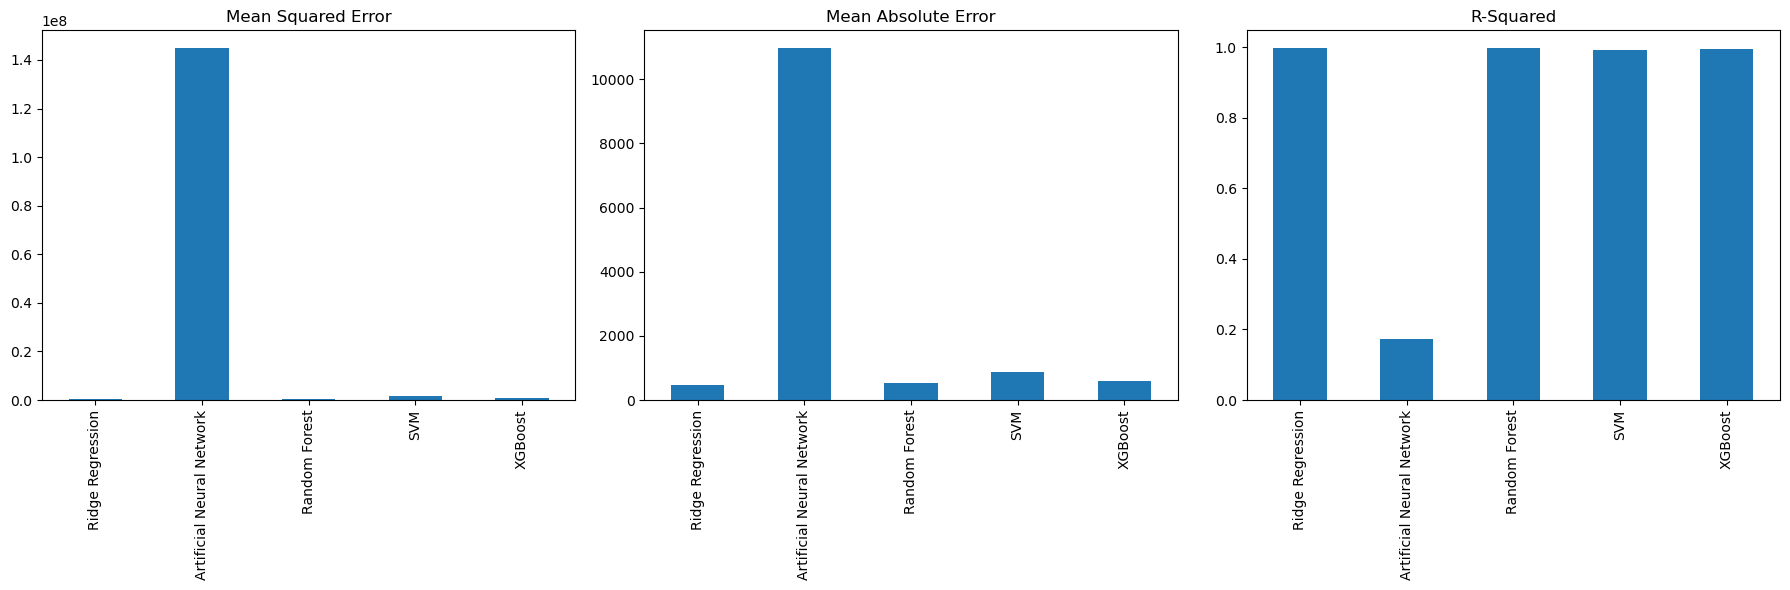

In [68]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

results_df['MSE'].plot(kind='bar', ax=ax[0], title='Mean Squared Error')
results_df['MAE'].plot(kind='bar', ax=ax[1], title='Mean Absolute Error')
results_df['R2'].plot(kind='bar', ax=ax[2], title='R-Squared')

plt.tight_layout()
plt.show()

In [69]:
for name, model in best_estimators.items():
    y_pred = model.predict(X_train_scaled)
    mse = mean_squared_error(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Display results
perfontrainset = pd.DataFrame(results).T
perfontrainset

,MSE,MAE,R2
Ridge Regression,1.074500e+06,626.398628,0.993412
Artificial Neural Network,1.457832e+08,10980.371833,0.106235
Random Forest,1.818900e+05,262.207003,0.998885
SVM,2.397132e+06,1074.683103,0.985304
XGBoost,4.103788e+05,452.615357,0.997484


In [70]:
#It can be observed that while the enseble models (random forest and Xgboost) perform better on the training set,
# the overfitting caused these two models to perform worse than ridge regression model on the test set.

In [71]:
#Let's try gridsearch with random forest and Xgboost again. This time with hyperparameter values with more bias 
#to reduce overfitting
new_param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [3, 5, 10],
        'min_samples_split': [5, 10, 15],
        'min_samples_leaf': [2, 4, 6]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [1, 1.5, 2]
    }
}


In [72]:
retry_models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Perform grid search
best_estimators_retry = {}
for name, model in retry_models.items():
    grid_search = GridSearchCV(model, new_param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_estimators_retry[name] = grid_search.best_estimator_


# Evaluate the best models
new_results = {}
for name, model in best_estimators_retry.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    new_results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Display results
new_results_df = pd.DataFrame(new_results).T
new_results_df
#This gridsearch appears to be futile as the error is still roughly the same

,MSE,MAE,R2
Random Forest,614589.971898,533.594828,0.996489
XGBoost,734749.027372,601.359434,0.995802


In [73]:
#Since we are dealing with sequential data, let's just try a LSTM.
look_back = 10

# Prepare the data
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back,:])
        y.append(data[(i + look_back),-1])
    return np.array(X), np.array(y)
dataforLSTM=dfcompleteshifted.drop(['Date'],axis=1)
dataforLSTM


,BTC_Close,BTC_Volume,S&P500_Close,50MA,100MA,RSI,macd,macdsignal,macdhist,20WMA,21WEMA,8WEMA,ETH_Close,Gold_Close,BTC_Tdy
1,15787.284180,3.742949e+10,3949.94,19003.359180,19711.196660,31.395434,-943.971087,-802.481689,-141.489398,20469.276451,20405.151363,18771.212247,1108.353027,1739.6,16189.769531
2,16189.769531,3.072683e+10,4003.58,18934.682969,19629.901016,35.914150,-932.315739,-828.448499,-103.867240,20440.702553,20348.186744,18680.635309,1135.173462,1739.9,16610.707031
3,16610.707031,3.295888e+10,4027.26,18860.160234,19554.638359,40.340007,-878.980316,-838.554862,-40.425453,20412.577274,20297.680261,18608.006247,1183.199585,1745.6,16604.464844
4,16604.464844,2.612904e+10,4027.26,18789.035195,19481.850098,40.295565,-827.674386,-836.378767,8.704381,20376.626395,20247.771945,18537.706548,1203.983154,1745.6,16521.841797
5,16521.841797,1.867826e+10,4026.12,18720.363164,19413.708535,39.672548,-784.636257,-826.030265,41.394008,20339.417285,20197.421537,18466.974452,1198.925903,1754.0,16464.281250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,69892.828125,2.523085e+10,5254.35,61139.522500,52080.331641,57.918033,2125.478921,2315.408039,-189.929118,48543.861942,50240.560542,60706.071562,3511.806152,2238.4,69645.304688
496,69645.304688,1.713024e+10,5254.35,61589.484610,52338.093164,57.330162,2068.774755,2266.081382,-197.306628,48776.056613,50502.786814,61019.728865,3507.944336,2238.4,71333.648438
497,71333.648438,2.005094e+10,5254.35,62060.732031,52611.450625,60.290822,2135.455325,2239.956171,-104.500846,49020.907534,50784.284944,61381.620779,3647.856445,2238.4,69702.148438
498,69702.148438,3.487353e+10,5243.77,62488.896641,52871.076680,56.230588,2033.214116,2198.607760,-165.393644,49258.048912,51039.931748,61673.569118,3505.030029,2257.1,65446.972656


In [74]:
X = dataforLSTM.iloc[:,:-1].values
y = dataforLSTM.iloc[:,-1].values.reshape(-1, 1)

# Scale the features and the target
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)


# Concatenate scaled features with the scaled target column
data_scaled = np.hstack((X_scaled, y))

In [75]:
data_scaled

array([[0.00000000e+00, 3.29308818e-01, 1.13327850e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.61897695e+04],
       [7.02464107e-03, 2.60543709e-01, 1.49789618e-01, ...,
        9.06680206e-03, 5.53301365e-04, 1.66107070e+04],
       [1.43713304e-02, 2.83443128e-01, 1.65886088e-01, ...,
        2.53023087e-02, 1.10660273e-02, 1.66044648e+04],
       ...,
       [9.69459561e-01, 1.51015713e-01, 1.00000000e+00, ...,
        8.58493712e-01, 9.19955736e-01, 6.97021484e+04],
       [9.40984731e-01, 3.03086269e-01, 9.92808249e-01, ...,
        8.10210422e-01, 9.54444854e-01, 6.54469727e+04],
       [8.66718469e-01, 4.65509848e-01, 9.67004955e-01, ...,
        7.33202876e-01, 1.00000000e+00, 6.61212812e+04]])

In [76]:
X_sequences, y_sequences = create_sequences(data_scaled, look_back)

# Split into training and test sets
split = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:split], X_sequences[split:]
y_train, y_test = y_sequences[:split], y_sequences[split:]


In [81]:
model = Sequential()
model.add(LSTM(units=256, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(LSTM(units=256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=256))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)



Epoch 1/100
13/13 [==============================] - 8s 214ms/step - loss: 813009792.0000 - val_loss: 2989388544.0000
Epoch 2/100
13/13 [==============================] - 2s 124ms/step - loss: 812387328.0000 - val_loss: 2988945408.0000
Epoch 3/100
13/13 [==============================] - 2s 128ms/step - loss: 812184384.0000 - val_loss: 2988557312.0000
Epoch 4/100
13/13 [==============================] - 2s 132ms/step - loss: 811986368.0000 - val_loss: 2988177664.0000
Epoch 5/100
13/13 [==============================] - 2s 143ms/step - loss: 811785856.0000 - val_loss: 2987805696.0000
Epoch 6/100
13/13 [==============================] - 2s 157ms/step - loss: 811594944.0000 - val_loss: 2987437056.0000
Epoch 7/100
13/13 [==============================] - 2s 159ms/step - loss: 811403328.0000 - val_loss: 2987072000.0000
Epoch 8/100
13/13 [==============================] - 2s 179ms/step - loss: 811207104.0000 - val_loss: 2986708480.0000
Epoch 9/100
13/13 [==============================] - 2s 

Epoch 70/100
13/13 [==============================] - 3s 224ms/step - loss: 799828096.0000 - val_loss: 2964732160.0000
Epoch 71/100
13/13 [==============================] - 3s 206ms/step - loss: 799605376.0000 - val_loss: 2964379136.0000
Epoch 72/100
13/13 [==============================] - 3s 199ms/step - loss: 799463168.0000 - val_loss: 2964029184.0000
Epoch 73/100
13/13 [==============================] - 3s 237ms/step - loss: 799290240.0000 - val_loss: 2963680000.0000
Epoch 74/100
13/13 [==============================] - 3s 211ms/step - loss: 799079808.0000 - val_loss: 2963328000.0000
Epoch 75/100
13/13 [==============================] - 3s 207ms/step - loss: 798898752.0000 - val_loss: 2962976512.0000
Epoch 76/100
13/13 [==============================] - 3s 202ms/step - loss: 798741568.0000 - val_loss: 2962628352.0000
Epoch 77/100
13/13 [==============================] - 3s 212ms/step - loss: 798588032.0000 - val_loss: 2962281984.0000
Epoch 78/100
13/13 [============================

In [78]:
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

4/4 [==============================] - 1s 22ms/step


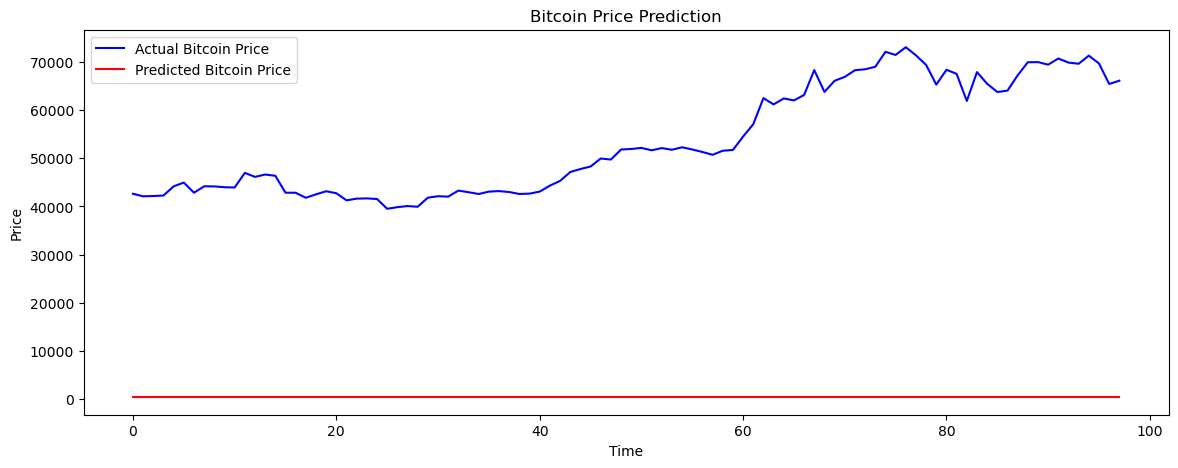

In [79]:
plt.figure(figsize=(14, 5))
plt.plot(y_test, color='blue', label='Actual Bitcoin Price')
plt.plot(y_pred, color='red', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [80]:
mae

53180.65897742806

In [86]:
"""" While Xgboost and Random forest preformed best on the training set, ridge regression performed best on the test
set. On the other hand, both the artificial neural network and LSTM models having poor perfomance can be attributed
to the models not having sufficient data to learn a proper relationship."""

'" While Xgboost and Random forest preformed best on the training set, ridge regression performed best on the test\nset. On the other hand, both the artificial neural network and LSTM models having poor perfomance can be attributed\nto the models not having sufficient data to learn a proper relationship.'